In [1]:
import tensorflow as tf
import keras

In [3]:
from keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [22]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit( 
    x_train, 
    y_train,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2518 - accuracy: 0.9062 - val_loss: 0.3762 - val_accuracy: 0.8648
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2442 - accuracy: 0.9084 - val_loss: 0.3425 - val_accuracy: 0.8839
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2350 - accuracy: 0.9124 - val_loss: 0.3409 - val_accuracy: 0.8837
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2267 - accuracy: 0.9152 - val_loss: 0.3345 - val_accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2213 - accuracy: 0.9176 - val_loss: 0.3410 - val_accuracy: 0.8848
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2128 - accuracy: 0.9200 - val_loss: 0.3365 - val_accuracy: 0.8886
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2072 - accuracy: 0.9227 - val_loss: 0.3536 - val_accuracy:

In [31]:
import matplotlib.pyplot as plt

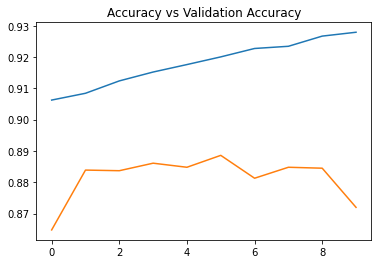

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Validation Accuracy')
plt.show()

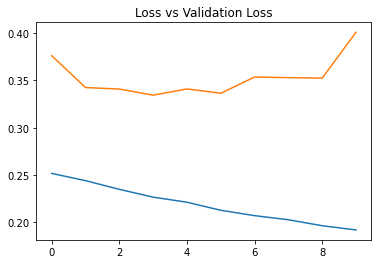

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Validation Loss')
plt.show()